## Henter pakkene vi trenger

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

## Leser data fra fil

In [4]:
pilot = pd.read_excel('M:\Documents\Jupyter\Pilot.xlsx')
print(pilot)

       x1      x2      x3      x4      x5      x6
0  0.0574  0.0570  0.0565  0.0558  0.0540  0.0556
1  0.0543  0.0585  0.0556  0.0551  0.0562  0.0563
2  0.0554  0.0550  0.0555  0.0551  0.0558  0.0544
3  0.0576  0.0580  0.0570  0.0580  0.0580  0.0569
4  0.0568  0.0570  0.0560  0.0570  0.0570  0.0560
5  0.0572  0.0580  0.0590  0.0580  0.0570  0.0570
6  0.0576  0.0560  0.0570  0.0580  0.0570  0.0550
7  0.0554  0.0560  0.0580  0.0580  0.0560  0.0550
8  0.0555  0.0570  0.0560  0.0550  0.0536  0.0544
9  0.0570  0.0566  0.0558  0.0550  0.0554  0.0556


## Pen utskrift

In [5]:
display(pilot)

,x1,x2,x3,x4,x5,x6
0,0.0574,0.0570,0.0565,0.0558,0.0540,0.0556
1,0.0543,0.0585,0.0556,0.0551,0.0562,0.0563
2,0.0554,0.0550,0.0555,0.0551,0.0558,0.0544
3,0.0576,0.0580,0.0570,0.0580,0.0580,0.0569
4,0.0568,0.0570,0.0560,0.0570,0.0570,0.0560
5,0.0572,0.0580,0.0590,0.0580,0.0570,0.0570
6,0.0576,0.0560,0.0570,0.0580,0.0570,0.0550
7,0.0554,0.0560,0.0580,0.0580,0.0560,0.0550
8,0.0555,0.0570,0.0560,0.0550,0.0536,0.0544
9,0.0570,0.0566,0.0558,0.0550,0.0554,0.0556


## Konverterer til array

In [7]:
pilot_tabell = pilot.to_numpy().flatten()
print(pilot_tabell)

[0.0574 0.057  0.0565 0.0558 0.054  0.0556 0.0543 0.0585 0.0556 0.0551
 0.0562 0.0563 0.0554 0.055  0.0555 0.0551 0.0558 0.0544 0.0576 0.058
 0.057  0.058  0.058  0.0569 0.0568 0.057  0.056  0.057  0.057  0.056
 0.0572 0.058  0.059  0.058  0.057  0.057  0.0576 0.056  0.057  0.058
 0.057  0.055  0.0554 0.056  0.058  0.058  0.056  0.055  0.0555 0.057
 0.056  0.055  0.0536 0.0544 0.057  0.0566 0.0558 0.055  0.0554 0.0556]


## Plotter alle verdier i rekkefølge

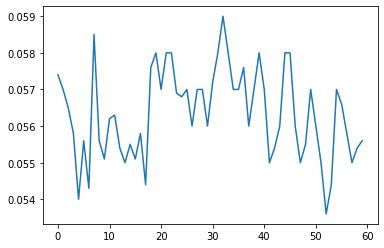

In [8]:
plt.figure()
plt.plot(pilot_tabell)

## Histogram

(array([ 2.,  3.,  7.,  8., 10.,  4., 13.,  3.,  8.,  2.]),
 array([0.0536 , 0.05414, 0.05468, 0.05522, 0.05576, 0.0563 , 0.05684,
        0.05738, 0.05792, 0.05846, 0.059  ]),
 <a list of 10 Patch objects>)

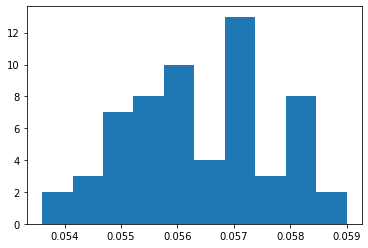

In [9]:
plt.hist(pilot_tabell)

## Oversikt over datamaterialet

In [11]:
sammendrag = pilot.apply(pd.DataFrame.describe, axis = 1)
display(sammendrag)

,count,mean,std,min,25%,50%,75%,max
0,6.0,0.056050,0.001216,0.0540,0.055650,0.05615,0.056875,0.0574
1,6.0,0.056000,0.001431,0.0543,0.055225,0.05590,0.056275,0.0585
2,6.0,0.055200,0.000486,0.0544,0.055025,0.05525,0.055475,0.0558
3,6.0,0.057583,0.000515,0.0569,0.057150,0.05780,0.058000,0.0580
4,6.0,0.056633,0.000497,0.0560,0.056200,0.05690,0.057000,0.0570
5,6.0,0.057700,0.000787,0.0570,0.057050,0.05760,0.058000,0.0590
6,6.0,0.056767,0.001098,0.0550,0.056250,0.05700,0.057450,0.0580
7,6.0,0.056400,0.001296,0.0550,0.055550,0.05600,0.057500,0.0580
8,6.0,0.055250,0.001200,0.0536,0.054550,0.05525,0.055875,0.0570
9,6.0,0.055900,0.000756,0.0550,0.055450,0.05570,0.056400,0.0570


## Shewhart

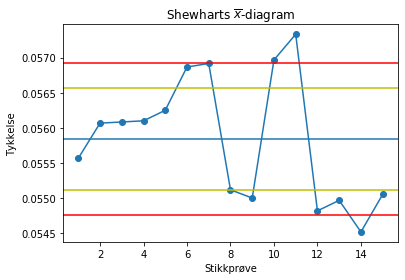

In [37]:
tykkelse = pd.read_excel('M:\Documents\Jupyter\Tykkelse.xlsx')

n = tykkelse.shape[1]
xm = tykkelse.mean(axis = 1)
s = tykkelse.std(axis = 1) #Standardavvik per måleserie

xmm = xm.mean() # Estimert forventning av middelverdiene
s2 = s ** 2 # Estimert varians per måleserie
s2m = s2.mean() #Estimert varians
sm = np.sqrt(s2m) #Estimert standardavvik

#Telling fra 1
dager = len(xm)
t = np.linspace(1,dager,dager)

nedre = xmm - 3 * sm / np.sqrt(n)
ovre = xmm + 3 * sm / np.sqrt(n)

nedre_varsel = xmm - 2 * sm / np.sqrt(n)
ovre_varsel = xmm + 2 * sm / np.sqrt(n)

plt.xlabel('Stikkprøve')
plt.ylabel('Tykkelse')
plt.title('Shewharts $\overline{x}$-diagram')

plt.plot(t,xm,'o-')
plt.axhline(nedre, color = 'r')
plt.axhline(ovre, color = 'r')
plt.axhline(xmm)
plt.axhline(nedre_varsel, color = 'y')
plt.axhline(ovre_varsel, color = 'y')

## s-diagram

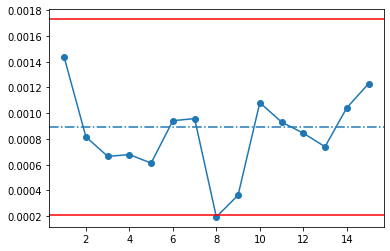

In [38]:
plt.plot(t,s,'o-')
nedre = sm * np.sqrt(stats.chi2.ppf(0.002,n-1)/(n-1))
ovre = sm * np.sqrt(stats.chi2.ppf(1-0.002,n-1)/(n-1))
plt.axhline(nedre, color = 'r')
plt.axhline(ovre, color = 'r')
plt.axhline(sm,linestyle='-.')

## p-diagram

[0.06 0.08 0.04 0.06 0.04 0.08 0.04 0.1 ]
0.02641428875250667 0.09358571124749332


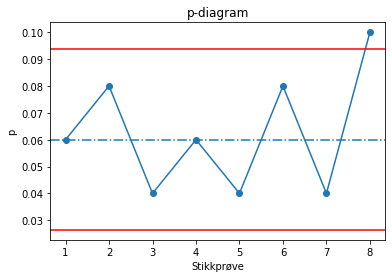

In [39]:
n = 50
antall_defekt = [3,4,2,3,2,4,2,5]
p_defekt = np.array(antall_defekt)
p_defekt = p_defekt/n
print(p_defekt)


dager = len(p_defekt)

t=np.linspace(1,dager,dager)
p_0 = 0.06
nedre = p_0 - np.sqrt(p_0*(1-p_0)/n)
ovre = p_0 + np.sqrt(p_0*(1-p_0)/n)
plt.xlabel('Stikkprøve')
print(nedre,ovre)

plt.ylabel('p')
plt.title('p-diagram')
plt.plot(t,p_defekt,'o-')
plt.axhline(p_0,linestyle='-.')
plt.axhline(nedre,color='r')
plt.axhline(ovre,color='r')